### Question 1
Load the energy data from the file `assets/Energy Indicators.xls`, which is a list of indicators of [energy supply and renewable electricity production](assets/Energy%20Indicators.xls) from the [United Nations](http://unstats.un.org/unsd/environment/excel_file_tables/2013/Energy%20Indicators.xls) for the year 2013, and should be put into a DataFrame with the variable name of **Energy**.

Keep in mind that this is an Excel file, and not a comma separated values file. Also, make sure to exclude the footer and header information from the datafile. The first two columns are unneccessary, so you should get rid of them, and you should change the column labels so that the columns are:

`['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable]`

Convert `Energy Supply` to gigajoules (**Note: there are 1,000,000 gigajoules in a petajoule**). For all countries which have missing data (e.g. data with "...") make sure this is reflected as `np.NaN` values.

Rename the following list of countries (for use in later questions):

```"Republic of Korea": "South Korea",
"United States of America": "United States",
"United Kingdom of Great Britain and Northern Ireland": "United Kingdom",
"China, Hong Kong Special Administrative Region": "Hong Kong"```

There are also several countries with parenthesis in their name. Be sure to remove these, e.g. `'Bolivia (Plurinational State of)'` should be `'Bolivia'`. Additionally, there are several countries with Numeric digits in their name. Make sure to remove these as well, e.g. `'Italy9'` should be `'Italy'`. 

Next, load the GDP data from the file `assets/world_bank.csv`, which is a csv containing countries' GDP from 1960 to 2015 from [World Bank](http://data.worldbank.org/indicator/NY.GDP.MKTP.CD). Call this DataFrame **GDP**. 

Make sure to skip the header, and rename the following list of countries:

```"Korea, Rep.": "South Korea", 
"Iran, Islamic Rep.": "Iran",
"Hong Kong SAR, China": "Hong Kong"```

Finally, load the [Sciamgo Journal and Country Rank data for Energy Engineering and Power Technology](http://www.scimagojr.com/countryrank.php?category=2102) from the file `assets/scimagojr-3.xlsx`, which ranks countries based on their journal contributions in the aforementioned area. Call this DataFrame **ScimEn**.

Join the three datasets: GDP, Energy, and ScimEn into a new dataset (using the intersection of country names). Use only the last 10 years (2006-2015) of GDP data and only the top 15 countries by Scimagojr 'Rank' (Rank 1 through 15). 

The index of this DataFrame should be the name of the country, and the columns should be ['Rank', 'Documents', 'Citable documents', 'Citations', 'Self-citations',
       'Citations per document', 'H index', 'Energy Supply',
       'Energy Supply per Capita', '% Renewable', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015'].

*This function should return a DataFrame with 20 columns and 15 entries, and the rows of the DataFrame should be sorted by "Rank".*

In [2]:
import pandas as pd 
import numpy as np
import re

In [93]:
Energy=pd.read_excel("assets/Energy Indicators.xls", skipfooter=38,skiprows=17)
Energy=Energy.drop([Energy.columns[0],Energy.columns[1]],axis=1)
Energy=Energy.rename(columns={'Unnamed: 2':'Country','Petajoules':'Energy Supply','Gigajoules':'Energy Supply per Capita','%':'% Renewable'})
Energy.replace("...",np.nan,inplace=True)
Energy['Energy Supply']=(10**6)*Energy['Energy Supply']
countries= Energy[Energy.columns[0]].tolist()
countries = [re.sub(r'\([^)]*\)', '', country).strip() for country in countries]
countries = [re.sub(r'\d+', '', country).strip() for country in countries]
Energy[Energy.columns[0]]=countries
Energy[Energy.columns[0]]=Energy[Energy.columns[0]].replace({
    "Republic of Korea": "South Korea",
    "United States of America": "United States", 
    "United Kingdom of Great Britain and Northern Ireland": "United Kingdom",
    "China, Hong Kong Special Administrative Region": "Hong Kong"
})

Energy=Energy.set_index('Country')

GDP=pd.read_csv('assets/world_bank.csv',skiprows=4)
GDP[GDP.columns[0]]=GDP[GDP.columns[0]].replace({
"Korea, Rep.": "South Korea",  "Iran, Islamic Rep.": "Iran", "Hong Kong SAR, China": "Hong Kong"
})
GDP=GDP.set_index(GDP.columns[0])
countries= GDP.index.tolist()
countries = [re.sub(r'\([^)]*\)', '', country).strip() for country in countries]
countries = [re.sub(r'\b[A-Z][a-z]+(?:\s[A-Z][a-z]+)*\s\(\w[^()]*\)', '', country).strip() for country in countries]
GDP.index=countries

ScimEn=pd.read_excel('assets/scimagojr-3.xlsx')
ScimEn=ScimEn.set_index(ScimEn.columns[1])

data=pd.merge(pd.merge(ScimEn.iloc[:15,:],Energy,left_index=True, right_index=True, how='left'), GDP.iloc[:,-10:] ,left_index=True, right_index=True, how='left')
data=data.sort_values(by='Rank', ascending=True)
print(data.shape)
data

(15, 20)


,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,% Renewable,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country,,,,,,,,,,,,,,,,,,,,
China,1,127050,126767,597237,411683,4.70,138,1.271910e+11,93.0,19.754910,3.992331e+12,4.559041e+12,4.997775e+12,5.459247e+12,6.039659e+12,6.612490e+12,7.124978e+12,7.672448e+12,8.230121e+12,8.797999e+12
United States,2,96661,94747,792274,265436,8.20,230,9.083800e+10,286.0,11.570980,1.479230e+13,1.505540e+13,1.501149e+13,1.459484e+13,1.496437e+13,1.520402e+13,1.554216e+13,1.577367e+13,1.615662e+13,1.654857e+13
Japan,3,30504,30287,223024,61554,7.31,134,1.898400e+10,149.0,10.232820,5.496542e+12,5.617036e+12,5.558527e+12,5.251308e+12,5.498718e+12,5.473738e+12,5.569102e+12,5.644659e+12,5.642884e+12,5.669563e+12
United Kingdom,4,20944,20357,206091,37874,9.84,139,7.920000e+09,124.0,10.600470,2.419631e+12,2.482203e+12,2.470614e+12,2.367048e+12,2.403504e+12,2.450911e+12,2.479809e+12,2.533370e+12,2.605643e+12,2.666333e+12
Russian Federation,5,18534,18301,34266,12422,1.85,57,3.070900e+10,214.0,17.288680,1.385793e+12,1.504071e+12,1.583004e+12,1.459199e+12,1.524917e+12,1.589943e+12,1.645876e+12,1.666934e+12,1.678709e+12,1.616149e+12
Canada,6,17899,17620,215003,40930,12.01,149,1.043100e+10,296.0,61.945430,1.564469e+12,1.596740e+12,1.612713e+12,1.565145e+12,1.613406e+12,1.664087e+12,1.693133e+12,1.730688e+12,1.773486e+12,1.792609e+12
Germany,7,17027,16831,140566,27426,8.26,126,1.326100e+10,165.0,17.901530,3.332891e+12,3.441561e+12,3.478809e+12,3.283340e+12,3.417298e+12,3.542371e+12,3.556724e+12,3.567317e+12,3.624386e+12,3.685556e+12
India,8,15005,14841,128763,37209,8.58,115,3.319500e+10,26.0,14.969080,1.265894e+12,1.374865e+12,1.428361e+12,1.549483e+12,1.708459e+12,1.821872e+12,1.924235e+12,2.051982e+12,2.200617e+12,2.367206e+12
France,9,13153,12973,130632,28601,9.93,114,1.059700e+10,166.0,17.020280,2.607840e+12,2.669424e+12,2.674637e+12,2.595967e+12,2.646995e+12,2.702032e+12,2.706968e+12,2.722567e+12,2.729632e+12,2.761185e+12


In [35]:
pip install --upgrade openpyxl 

Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.9/250.9 kB 1.9 MB/s eta 0:00:0000:010:01

[notice] A new release of pip is available: 23.3.2 -> 24.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [100]:
def answer_one():
    Energy=pd.read_excel("assets/Energy Indicators.xls", skipfooter=38,skiprows=17)
    Energy=Energy.drop([Energy.columns[0],Energy.columns[1]],axis=1)
    Energy=Energy.rename(columns={'Unnamed: 2':'Country','Petajoules':'Energy Supply','Gigajoules':'Energy Supply per Capita','%':'% Renewable'})
    Energy.replace("...",np.nan,inplace=True)
    Energy['Energy Supply']=(10**6)*Energy['Energy Supply']
    countries= Energy[Energy.columns[0]].tolist()
    countries = [re.sub(r'\([^)]*\)', '', country).strip() for country in countries]
    countries = [re.sub(r'\d+', '', country).strip() for country in countries]
    Energy[Energy.columns[0]]=countries
    Energy[Energy.columns[0]]=Energy[Energy.columns[0]].replace({
        "Republic of Korea": "South Korea",
        "United States of America": "United States", 
        "United Kingdom of Great Britain and Northern Ireland": "United Kingdom",
        "China, Hong Kong Special Administrative Region": "Hong Kong"
    })

    Energy=Energy.set_index('Country')

    GDP=pd.read_csv('assets/world_bank.csv',skiprows=4)
    GDP[GDP.columns[0]]=GDP[GDP.columns[0]].replace({
    "Korea, Rep.": "South Korea",  "Iran, Islamic Rep.": "Iran", "Hong Kong SAR, China": "Hong Kong"
    })
    GDP=GDP.set_index(GDP.columns[0])
    countries= GDP.index.tolist()
    countries = [re.sub(r'\([^)]*\)', '', country).strip() for country in countries]
    countries = [re.sub(r'\b[A-Z][a-z]+(?:\s[A-Z][a-z]+)*\s\(\w[^()]*\)', '', country).strip() for country in countries]
    GDP.index=countries

    ScimEn=pd.read_excel('assets/scimagojr-3.xlsx')
    ScimEn=ScimEn.set_index(ScimEn.columns[1])

    data=pd.merge(pd.merge(ScimEn.iloc[:15,:],Energy,left_index=True, right_index=True, how='left'), GDP.iloc[:,-10:] ,left_index=True, right_index=True, how='left')
    data=data.sort_values(by='Rank', ascending=True)
    
    return data

In [101]:
answer_one()

,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,% Renewable,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country,,,,,,,,,,,,,,,,,,,,
China,1,127050,126767,597237,411683,4.70,138,1.271910e+11,93.0,19.754910,3.992331e+12,4.559041e+12,4.997775e+12,5.459247e+12,6.039659e+12,6.612490e+12,7.124978e+12,7.672448e+12,8.230121e+12,8.797999e+12
United States,2,96661,94747,792274,265436,8.20,230,9.083800e+10,286.0,11.570980,1.479230e+13,1.505540e+13,1.501149e+13,1.459484e+13,1.496437e+13,1.520402e+13,1.554216e+13,1.577367e+13,1.615662e+13,1.654857e+13
Japan,3,30504,30287,223024,61554,7.31,134,1.898400e+10,149.0,10.232820,5.496542e+12,5.617036e+12,5.558527e+12,5.251308e+12,5.498718e+12,5.473738e+12,5.569102e+12,5.644659e+12,5.642884e+12,5.669563e+12
United Kingdom,4,20944,20357,206091,37874,9.84,139,7.920000e+09,124.0,10.600470,2.419631e+12,2.482203e+12,2.470614e+12,2.367048e+12,2.403504e+12,2.450911e+12,2.479809e+12,2.533370e+12,2.605643e+12,2.666333e+12
Russian Federation,5,18534,18301,34266,12422,1.85,57,3.070900e+10,214.0,17.288680,1.385793e+12,1.504071e+12,1.583004e+12,1.459199e+12,1.524917e+12,1.589943e+12,1.645876e+12,1.666934e+12,1.678709e+12,1.616149e+12
Canada,6,17899,17620,215003,40930,12.01,149,1.043100e+10,296.0,61.945430,1.564469e+12,1.596740e+12,1.612713e+12,1.565145e+12,1.613406e+12,1.664087e+12,1.693133e+12,1.730688e+12,1.773486e+12,1.792609e+12
Germany,7,17027,16831,140566,27426,8.26,126,1.326100e+10,165.0,17.901530,3.332891e+12,3.441561e+12,3.478809e+12,3.283340e+12,3.417298e+12,3.542371e+12,3.556724e+12,3.567317e+12,3.624386e+12,3.685556e+12
India,8,15005,14841,128763,37209,8.58,115,3.319500e+10,26.0,14.969080,1.265894e+12,1.374865e+12,1.428361e+12,1.549483e+12,1.708459e+12,1.821872e+12,1.924235e+12,2.051982e+12,2.200617e+12,2.367206e+12
France,9,13153,12973,130632,28601,9.93,114,1.059700e+10,166.0,17.020280,2.607840e+12,2.669424e+12,2.674637e+12,2.595967e+12,2.646995e+12,2.702032e+12,2.706968e+12,2.722567e+12,2.729632e+12,2.761185e+12


### Question 2
The previous question joined three datasets then reduced this to just the top 15 entries. When you joined the datasets, but before you reduced this to the top 15 items, how many entries did you lose?

*This function should return a single number.*

In [109]:
def answer_two():

    Energy=pd.read_excel("assets/Energy Indicators.xls", skipfooter=38,skiprows=17)
    Energy=Energy.drop([Energy.columns[0],Energy.columns[1]],axis=1)
    Energy=Energy.rename(columns={'Unnamed: 2':'Country','Petajoules':'Energy Supply','Gigajoules':'Energy Supply per Capita','%':'% Renewable'})
    Energy.replace("...",np.nan,inplace=True)
    Energy['Energy Supply']=(10**6)*Energy['Energy Supply']
    countries= Energy[Energy.columns[0]].tolist()
    countries = [re.sub(r'\([^)]*\)', '', country).strip() for country in countries]
    countries = [re.sub(r'\d+', '', country).strip() for country in countries]
    Energy[Energy.columns[0]]=countries
    Energy[Energy.columns[0]]=Energy[Energy.columns[0]].replace({
        "Republic of Korea": "South Korea",
        "United States of America": "United States", 
        "United Kingdom of Great Britain and Northern Ireland": "United Kingdom",
        "China, Hong Kong Special Administrative Region": "Hong Kong"
    })

    Energy=Energy.set_index('Country')

    GDP=pd.read_csv('assets/world_bank.csv',skiprows=4)
    GDP[GDP.columns[0]]=GDP[GDP.columns[0]].replace({
    "Korea, Rep.": "South Korea",  "Iran, Islamic Rep.": "Iran", "Hong Kong SAR, China": "Hong Kong"
    })
    GDP=GDP.set_index(GDP.columns[0])
    countries= GDP.index.tolist()
    countries = [re.sub(r'\([^)]*\)', '', country).strip() for country in countries]
    countries = [re.sub(r'\b[A-Z][a-z]+(?:\s[A-Z][a-z]+)*\s\(\w[^()]*\)', '', country).strip() for country in countries]
    GDP.index=countries

    ScimEn=pd.read_excel('assets/scimagojr-3.xlsx')
    ScimEn=ScimEn.set_index(ScimEn.columns[1])
    
    data=pd.merge(pd.merge(ScimEn,Energy,left_index=True, right_index=True, how='outer'), GDP.iloc[:,-10:] ,left_index=True, right_index=True,how='outer')
    return(len(data)-15)
    

In [111]:
answer_two()

303

### Question 3
What are the top 15 countries for average GDP over the last 10 years?

*This function should return a Series named `avgGDP` with 15 countries and their average GDP sorted in descending order.*

In [168]:
def answer_three():
    data=answer_one()
    data['avgGDP']=data.iloc[:,-10:].mean(axis=1)
    data=data.sort_values(by='avgGDP',ascending=False)
    return pd.Series(data.head(15)['avgGDP'])


In [169]:
print(type(answer_three()))
answer_three()

<class 'pandas.core.series.Series'>


Country
United States         1.536434e+13
China                 6.348609e+12
Japan                 5.542208e+12
Germany               3.493025e+12
France                2.681725e+12
United Kingdom        2.487907e+12
Brazil                2.189794e+12
Italy                 2.120175e+12
India                 1.769297e+12
Canada                1.660647e+12
Russian Federation    1.565459e+12
Spain                 1.418078e+12
Australia             1.164043e+12
South Korea           1.106715e+12
Iran                  4.441558e+11
Name: avgGDP, dtype: float64

### Question 4
By how much had the GDP changed over the 10 year span for the country with the 6th largest average GDP?

*This function should return a single number.*

In [170]:
def answer_four():
    data=answer_one()
    data['avgGDP']=data.iloc[:,-10:].mean(axis=1)
    data=data.sort_values(by='avgGDP',ascending=False)

    return (data.iloc[5,-2]-data.iloc[5,-11])


In [171]:
answer_four()

246702696075.3999

### Question 5
What is the mean energy supply per capita?

*This function should return a single number.*

In [172]:
def answer_five():
    data=answer_one()
    return np.mean(data['Energy Supply per Capita'])

In [173]:
answer_five()

157.6

### Question 6
What country has the maximum % Renewable and what is the percentage?

*This function should return a tuple with the name of the country and the percentage.*

In [174]:
def answer_six():
    data=answer_one()
    return ((data['Energy Supply per Capita'].idxmax(),data['Energy Supply per Capita'].max()))

In [175]:
answer_six()

('Canada', 296.0)

### Question 7
Create a new column that is the ratio of Self-Citations to Total Citations. 
What is the maximum value for this new column, and what country has the highest ratio?

*This function should return a tuple with the name of the country and the ratio.*

In [176]:
def answer_seven():
    data=answer_one()
    data['Ratio of Self-Citations to Total citations']=[data.loc[x,'Self-citations']/data.loc[x,'Citations'] for x in list(data.index)]
    return ((data['Ratio of Self-Citations to Total citations'].idxmax(),data['Ratio of Self-Citations to Total citations'].max()))

In [177]:
answer_seven()


('China', 0.6893126179389422)

### Question 8

Create a column that estimates the population using Energy Supply and Energy Supply per capita. 
What is the third most populous country according to this estimate?

*This function should return the name of the country*

In [178]:
def answer_eight():
    data=answer_one()
    data['Population']=[data.loc[x,'Energy Supply']/data.loc[x,'Energy Supply per Capita'] for x in list(data.index)]
    return data['Population'].idxmax()

In [179]:
answer_eight()

'China'

### Question 9
Create a column that estimates the number of citable documents per person. 
What is the correlation between the number of citable documents per capita and the energy supply per capita? Use the `.corr()` method, (Pearson's correlation).

*This function should return a single number.*

*(Optional: Use the built-in function `plot9()` to visualize the relationship between Energy Supply per Capita vs. Citable docs per Capita)*

In [188]:
def answer_nine():
    data=answer_one()
    data['Population']=[data.loc[x,'Energy Supply']/data.loc[x,'Energy Supply per Capita'] for x in list(data.index)]
    data['Citable documents per person']=[data.loc[x,'Citable documents']/data.loc[x,'Population'] for x in list(data.index)]
    return data['Citable documents per person'].corr(data['Energy Supply per Capita'])

In [166]:
def plot9():
    import matplotlib as plt
    %matplotlib inline
    
    Top15 = answer_one()
    Top15['PopEst'] = Top15['Energy Supply'] / Top15['Energy Supply per Capita']
    Top15['Citable docs per Capita'] = Top15['Citable documents'] / Top15['PopEst']
    Top15.plot(x='Citable docs per Capita', y='Energy Supply per Capita', kind='scatter', xlim=[0, 0.0006])

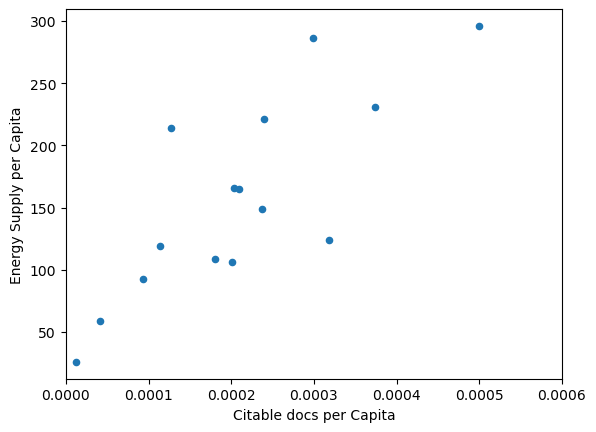

In [167]:
plot9()

In [189]:
answer_nine()

0.7940010435442946

### Question 10
Create a new column with a 1 if the country's % Renewable value is at or above the median for all countries in the top 15, and a 0 if the country's % Renewable value is below the median.

*This function should return a series named `HighRenew` whose index is the country name sorted in ascending order of rank.*

In [190]:
def answer_ten():
    data=answer_one()
    data['HighRenew']=[1 if data.loc[x,'% Renewable']>data['% Renewable'].mean() else 0 for x in list(data.index)]
    data=data.sort_values(by='Rank')
    return pd.Series(data['HighRenew'])

In [191]:
answer_ten()

Country
China                 0
United States         0
Japan                 0
United Kingdom        0
Russian Federation    0
Canada                1
Germany               0
India                 0
France                0
South Korea           0
Italy                 1
Spain                 1
Iran                  0
Australia             0
Brazil                1
Name: HighRenew, dtype: int64

### Question 11
Use the following dictionary to group the Countries by Continent, then create a DataFrame that displays the sample size (the number of countries in each continent bin), and the sum, mean, and std deviation for the estimated population of each country.

```python
ContinentDict  = {'China':'Asia', 
                  'United States':'North America', 
                  'Japan':'Asia', 
                  'United Kingdom':'Europe', 
                  'Russian Federation':'Europe', 
                  'Canada':'North America', 
                  'Germany':'Europe', 
                  'India':'Asia',
                  'France':'Europe', 
                  'South Korea':'Asia', 
                  'Italy':'Europe', 
                  'Spain':'Europe', 
                  'Iran':'Asia',
                  'Australia':'Australia', 
                  'Brazil':'South America'}
```

*This function should return a DataFrame with index named Continent `['Asia', 'Australia', 'Europe', 'North America', 'South America']` and columns `['size', 'sum', 'mean', 'std']`*

In [ ]:
def answer_eleven():
    ContinentDict  = {'China':'Asia', 
                  'United States':'North America', 
                  'Japan':'Asia', 
                  'United Kingdom':'Europe', 
                  'Russian Federation':'Europe', 
                  'Canada':'North America', 
                  'Germany':'Europe', 
                  'India':'Asia',
                  'France':'Europe', 
                  'South Korea':'Asia', 
                  'Italy':'Europe', 
                  'Spain':'Europe', 
                  'Iran':'Asia',
                  'Australia':'Australia', 
                  'Brazil':'South America'}
    data=answer_one()
    data['Population']=[data.loc[x,'Energy Supply']/data.loc[x,'Energy Supply per Capita'] for x in list(data.index)]